In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [3]:

df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241114_173118.braidz")


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241114_173118.braidz using pyarrow


In [4]:
df,csvs['stim']

(         obj_id    frame     timestamp         x         y         z  \
 0           315    16943  1.731602e+09 -0.193896  0.052315 -0.012931   
 1           315    16944  1.731602e+09 -0.191773  0.055389 -0.005975   
 2           315    16945  1.731602e+09 -0.190855  0.056177 -0.003868   
 3           315    16946  1.731602e+09 -0.190246  0.056427 -0.003036   
 4           315    16947  1.731602e+09 -0.189973  0.056409 -0.002915   
 ...         ...      ...           ...       ...       ...       ...   
 1058452   16512  6400648  1.731666e+09 -0.112187  0.078073 -0.006104   
 1058453   16512  6400649  1.731666e+09 -0.112178  0.078082 -0.006078   
 1058454   16512  6400650  1.731666e+09 -0.112168  0.078090 -0.006053   
 1058455   16512  6400651  1.731666e+09 -0.112198  0.078004 -0.006019   
 1058456   16512  6400652  1.731666e+09 -0.112208  0.077913 -0.005996   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.070897 -0.053243  0.047761  4.191841e-07

In [5]:
data = extract_stimulus_centered_data(df, csvs["stim"])
AngV = data['angular_velocity']

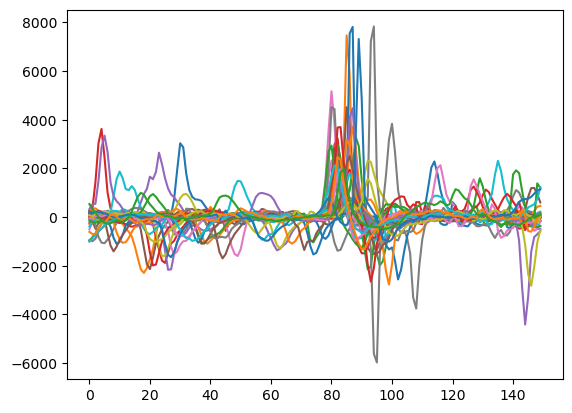

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

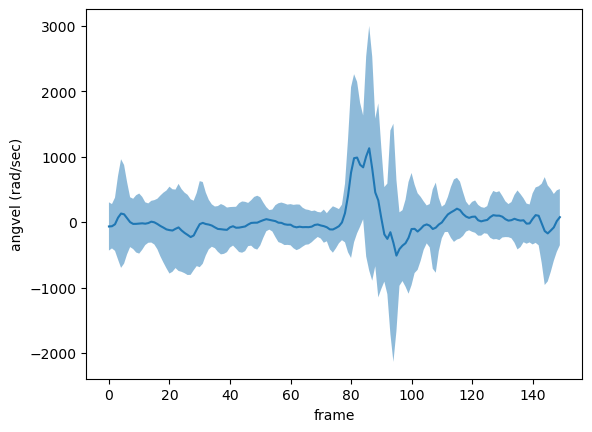

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

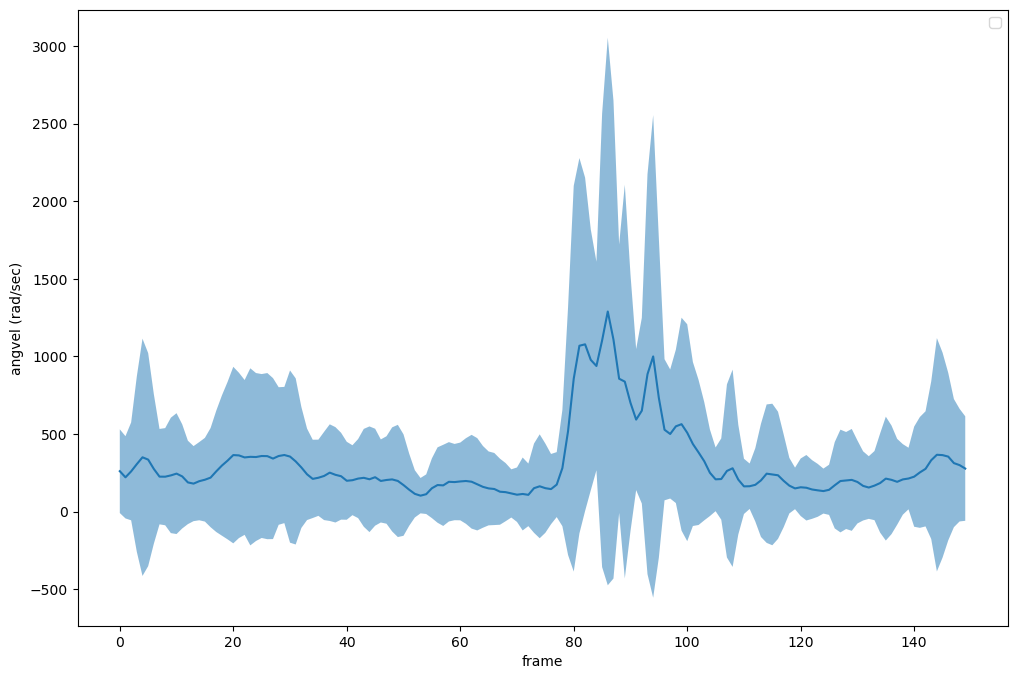

In [9]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.legend()
plt.show()